In [12]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import xgboost as xgb
# Ensure SHAP plots display correctly
shap.initjs()

In [14]:
# Step 1: Load your dataset
# Replace with your actual dataset
data = pd.read_excel("Data.xlsx")


In [15]:
data.columns

Index(['Pre PCI EF', 'Age', 'Gender', 'BMI', 'waist_circ', 'Total Cholesterol',
       'Triglyceride', 'LDL', 'HDL', 'LDLtoHDL', 'LDL/Chl', 'HDL/Chl', 'FBS',
       'Creatinine', 'Hemoglobin', 'Hyperlipidemia', 'Diabetes',
       'Hypertension', 'Smoking', 'PreviousCABG', 'PreviousPCI',
       'Door to Device Distance', 'MACE'],
      dtype='object')

In [16]:
data2=data.drop([], axis=1)

In [17]:
# Step 2: Separate features and target
X = data2.drop(['MACE'], axis=1)
y = data2['MACE']

In [18]:
categorical_cols = ['Gender', 'Hyperlipidemia', 'Diabetes', 'Hypertension', 'Smoking',
       'PreviousCABG', 'PreviousPCI', 'Door to Device Distance',]  # Replace with actual categorical columns
continuous_cols = ['Pre PCI EF', 'Age', 'BMI', 'waist_circ', 'Total Cholesterol',
       'Triglyceride', 'LDL', 'HDL', 'LDLtoHDL', 'FBS', 'Creatinine',
       'Hemoglobin']

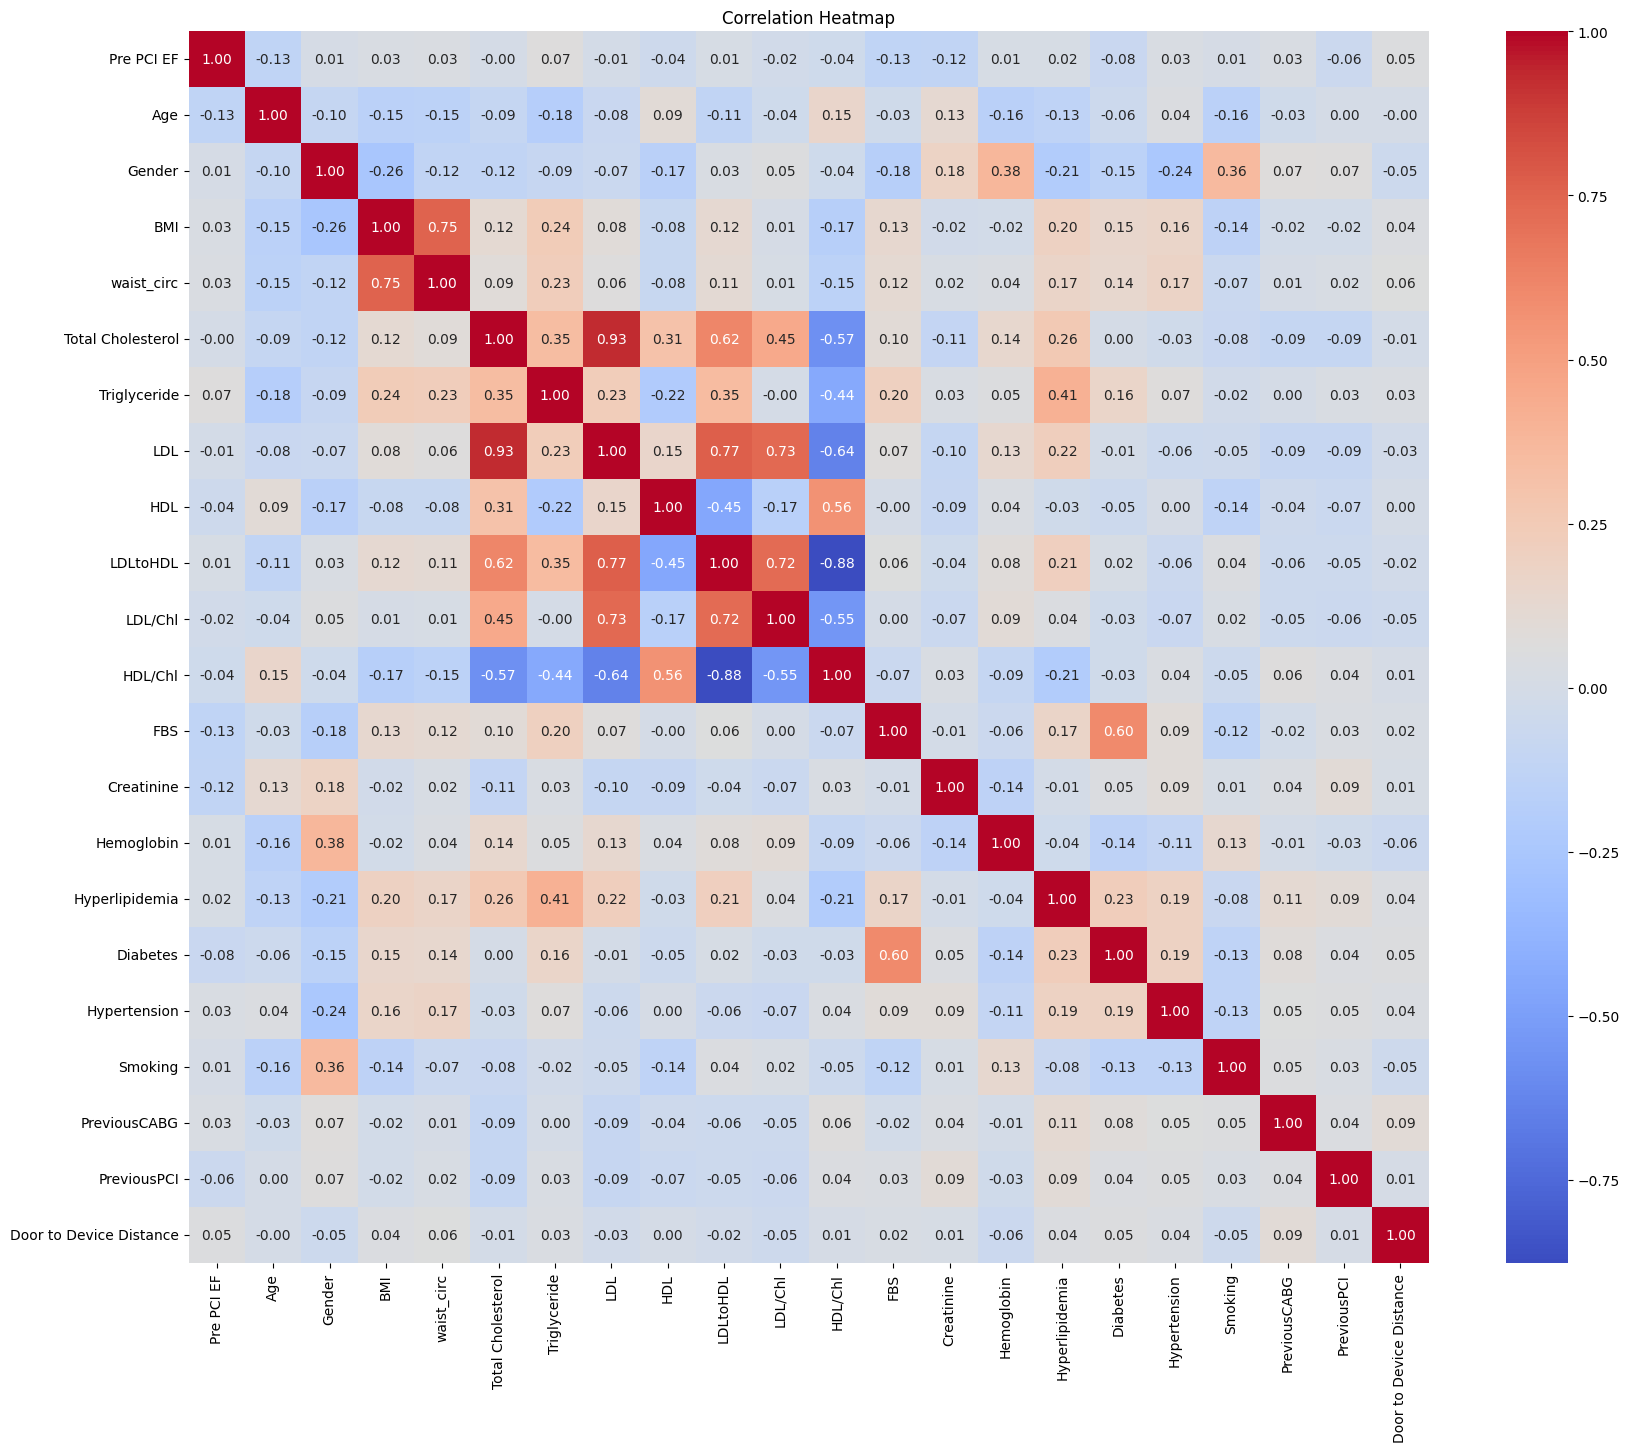

In [19]:

# Visualizations
# Step 12: Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(pd.DataFrame(X, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [20]:
# Step 4: Encode categorical columns using LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Step 5: Scale continuous columns
scaler = StandardScaler()
X[continuous_cols] = scaler.fit_transform(X[continuous_cols])

# Step 6: Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [21]:
X_resampled.head(5)

,Pre PCI EF,Age,Gender,BMI,waist_circ,Total Cholesterol,Triglyceride,LDL,HDL,LDLtoHDL,...,FBS,Creatinine,Hemoglobin,Hyperlipidemia,Diabetes,Hypertension,Smoking,PreviousCABG,PreviousPCI,Door to Device Distance
0,-0.053116,2.633705,0,-1.053419,-1.776786,-1.404061,-1.187334,-2.039688,2.844276,-2.175078,...,0.354148,-0.117119,-1.197160,0,0,0,0,0,0,151
1,-0.351673,0.420845,0,-1.228843,-0.484009,-0.397012,-1.101758,-1.644908,5.101624,-2.135096,...,-0.854496,-0.358538,-0.573529,0,0,1,0,0,0,86
2,0.543998,1.158465,0,0.754120,0.624085,-0.715028,-1.016182,-1.675276,4.588591,-2.118534,...,-0.135429,-0.841376,0.206009,1,1,1,0,0,0,64
3,0.543998,0.420845,0,-0.540469,-0.484009,-1.722077,-0.787978,-2.161159,0.894749,-2.085035,...,-0.257824,5.194105,-3.743653,0,0,0,0,0,1,73
4,-1.844458,-1.201919,1,-0.353941,-0.114645,-1.801581,-1.001919,-2.161159,0.586929,-2.049506,...,-0.854496,-1.710486,-1.602520,1,1,0,1,0,1,40


In [22]:

# Step 7: Train-test split on resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [23]:
X_train

,Pre PCI EF,Age,Gender,BMI,waist_circ,Total Cholesterol,Triglyceride,LDL,HDL,LDLtoHDL,...,FBS,Creatinine,Hemoglobin,Hyperlipidemia,Diabetes,Hypertension,Smoking,PreviousCABG,PreviousPCI,Door to Device Distance
2115,-0.894004,0.865447,1,1.750795,2.624244,0.355417,-0.592520,0.461953,0.835443,-0.232196,...,-0.301546,0.474525,1.583826,1,0,1,0,0,0,159
2126,-0.280270,-0.780186,1,0.548620,0.588957,-0.185002,0.529318,-0.221917,-0.566285,0.078663,...,-0.729941,-0.208959,0.528001,1,0,1,1,0,0,50
458,-0.650230,-0.906871,1,-0.971258,-0.206986,-0.847534,-0.274520,-0.946452,-0.849565,-0.472462,...,-0.701503,-0.599957,1.141456,1,0,0,0,1,0,199
78,-1.247344,1.010941,1,0.367742,0.993450,-1.589570,0.367302,-1.614541,-0.439139,-1.360846,...,1.425099,0.124301,-1.041252,0,1,1,1,0,1,24
2385,-0.775422,0.496960,0,0.273532,-0.696974,-0.631708,-0.272219,-0.434631,-0.775113,-0.002294,...,0.028120,0.556523,-0.092399,0,0,0,0,0,0,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.141112,-1.125014,0,0.215599,0.305860,0.735502,1.935049,0.317041,0.322820,0.092088,...,1.596565,-0.368823,0.427694,1,1,0,0,0,0,88
1095,-0.650230,1.896085,1,-0.553792,0.254720,0.716042,-1.173071,1.148918,0.073895,0.809895,...,0.017564,-0.358538,-0.365652,1,1,0,0,0,0,49
1130,-0.650230,1.305989,0,-1.055639,-0.391668,2.730141,-0.730927,3.092449,1.818209,0.936455,...,0.629536,-1.082796,0.102071,1,1,1,0,0,0,39
1294,-0.948787,-0.316775,0,-1.994938,-1.407421,1.484580,-1.030444,2.059948,-0.233925,1.917489,...,-0.364919,-1.082796,-0.053837,1,0,0,0,0,0,54


In [24]:
# Step 8: Build and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Step 9: Predict probabilities for class '1' on test data
predicted_probs = model.predict_proba(X_test)[:, 1]  # Probability for class '1'

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:59:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [25]:
X_test.columns

Index(['Pre PCI EF', 'Age', 'Gender', 'BMI', 'waist_circ', 'Total Cholesterol',
       'Triglyceride', 'LDL', 'HDL', 'LDLtoHDL', 'LDL/Chl', 'HDL/Chl', 'FBS',
       'Creatinine', 'Hemoglobin', 'Hyperlipidemia', 'Diabetes',
       'Hypertension', 'Smoking', 'PreviousCABG', 'PreviousPCI',
       'Door to Device Distance'],
      dtype='object')

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

In [29]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
y_pred_proba=model.predict(X_test)

In [30]:

accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Sensitivity (Recall), Specificity, PPV, NPV
sensitivity = tp / (tp + fn)  # Sensitivity or Recall
specificity = tn / (tn + fp)  # Specificity
ppv = tp / (tp + fp)          # Positive Predictive Value (PPV)
npv = tn / (tn + fn)          # Negative Predictive Value (NPV)

# Likelihood Ratios
lr_positive = sensitivity / (1 - specificity)  # Positive Likelihood Ratio
lr_negative = (1 - sensitivity) / specificity  # Negative Likelihood Ratio

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Balanced Accuracy: {balanced_acc}')
print(f'Sensitivity (Recall): {sensitivity}')
print(f'Specificity: {specificity}')
print(f'PPV: {ppv}')
print(f'NPV: {npv}')
print(f'Likelihood Ratio Positive: {lr_positive}')
print(f'Likelihood Ratio Negative: {lr_negative}')


Accuracy: 0.9212707182320442
Balanced Accuracy: 0.9213748616359403
Sensitivity (Recall): 0.9267605633802817
Specificity: 0.9159891598915989
PPV: 0.9138888888888889
NPV: 0.9285714285714286
Likelihood Ratio Positive: 11.031440254429803
Likelihood Ratio Negative: 0.07995666305525462


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, predicted_probs)

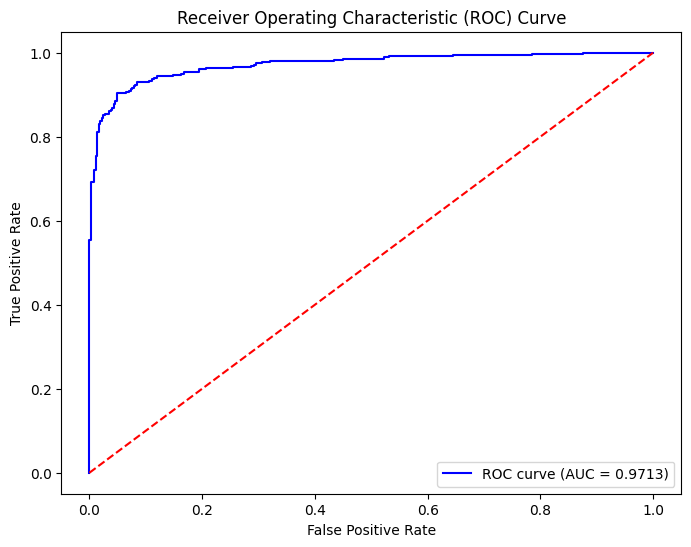

In [32]:
from sklearn.metrics import roc_curve, auc
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, predicted_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
# Step 10: Create SHAP explainer and generate SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

In [35]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Instantiate the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification (modify if multi-class)
    scale_pos_weight=len(y_resampled[y_resampled == 0]) / len(y_resampled[y_resampled == 1]),  # Handling imbalance
    eval_metric='auc',
    use_label_encoder=False
)

# Train the model
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9213
ROC AUC: 0.9713
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       369
           1       0.91      0.93      0.92       355

    accuracy                           0.92       724
   macro avg       0.92      0.92      0.92       724
weighted avg       0.92      0.92      0.92       724



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:59:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


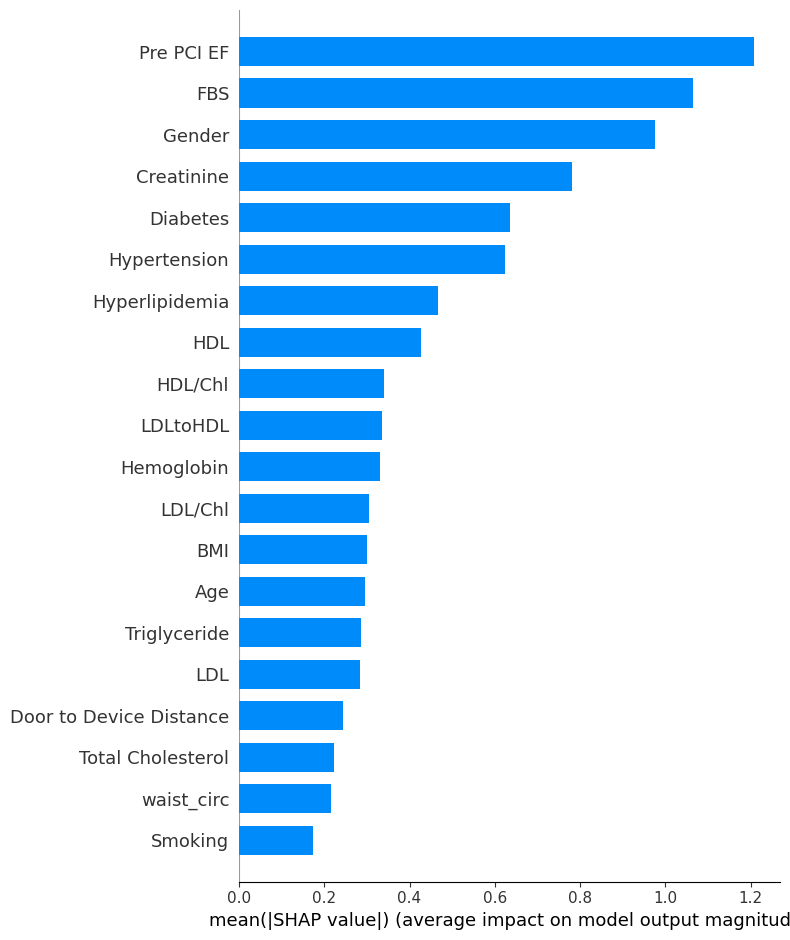

In [36]:
import shap

# SHAP requires a small subset of data for performance reasons
explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X_test)

# Summary plot - global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

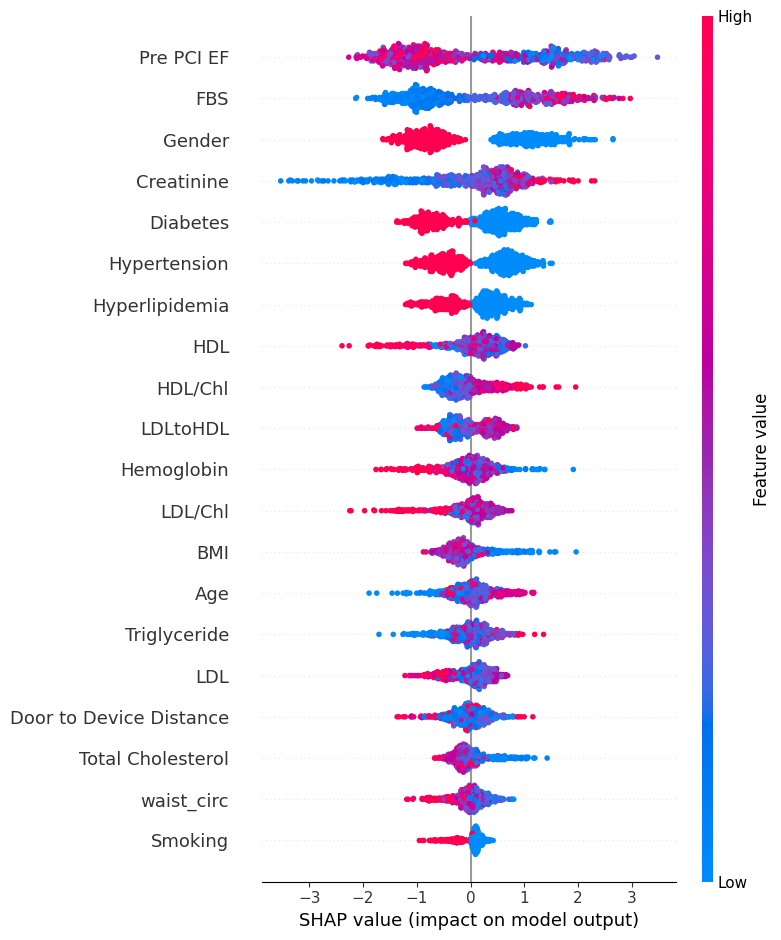

In [38]:

# 5. SHAP Beeswarm Plot (P Swarm Plot)
# Shows distribution of SHAP values for each feature
shap.summary_plot(shap_values, X_test)

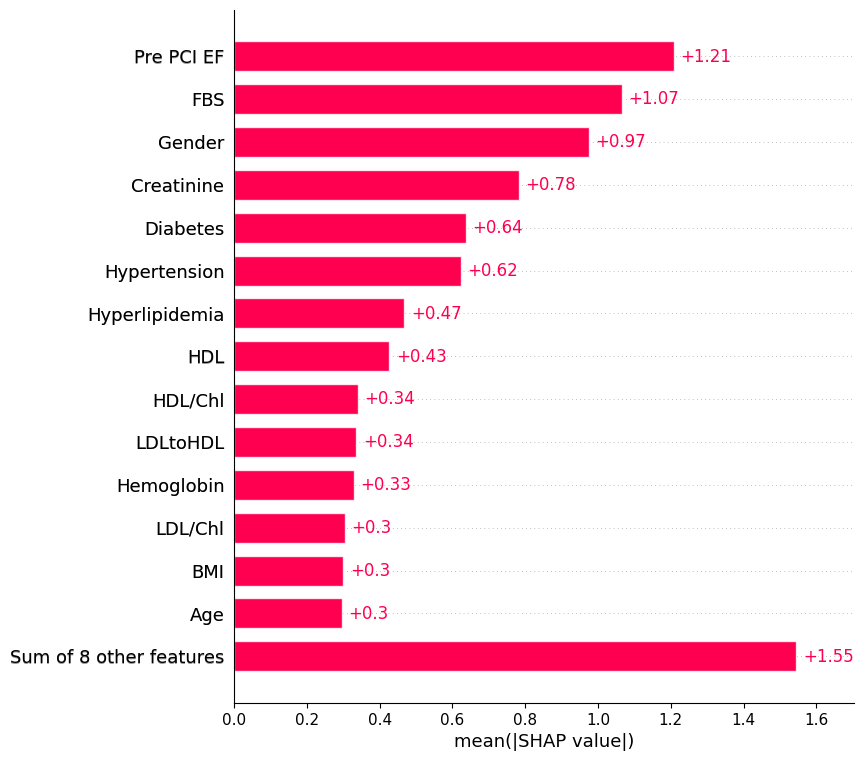

In [39]:
# 7. Bar Absolute Mean SHAP Plot (Feature Importance by Contribution)
# Bar plot showing the absolute mean SHAP values (to highlight feature importance)
shap.plots.bar(shap_values, max_display=15)